**CREDIT-PATH-AI**

Load libraries and Import dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("loan_data.csv")

Exploratory Data Analysis (EDA)

In [ ]:
# df.shape returns a tuple (number of rows, number of columns)
print("Shape of dataset:", df.shape)

# prints the list of all column names in the dataset
print("\nColumns:", df.columns.tolist())

# describe() gives summary statistics like count, mean, and standard deviation
print("\nDescription:\n", df.describe(include='all'))

df.info()

Shape of dataset: (22058, 34)

Columns: ['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status', 'dtir1']

Description:
                   ID     year loan_limit Gender approv_in_adv loan_type  \
count   22058.000000  22058.0      21569  22058         21927     22058   
unique           NaN      NaN          2      4             2         3   
top              NaN      NaN         cf   Male         nopre     type1   
freq             NaN      NaN      20098   6176         18457     16832   
mean    35918.500000   2019.0      

Clean the Dataset

In [ ]:
# Print missing values before cleaning
print("\nMissing values before cleaning:\n", df.isnull().sum())

# Numerical columns (fill with median)
num_cols = ['property_value', 'income', 'Credit_Score', 'LTV', 'dtir1',
            'term', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges']
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Target variable (Status) – fill with mode instead of dropping
if 'Status' in df.columns:
    df['Status'] = df['Status'].fillna(df['Status'].mode()[0])

# Categorical columns (fill with mode)
cat_cols = ['loan_limit', 'age', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization',
            'total_units', 'credit_type', 'co-applicant_credit_type',
            'Region', 'Security_Type', 'submission_of_application',
            'Gender', 'loan_type', 'Credit_Worthiness', 'open_credit',
            'business_or_commercial', 'interest_only', 'lump_sum_payment',
            'construction_type', 'occupancy_type', 'Secured_by']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Print missing values after cleaning
print("\nMissing values after cleaning:\n", df.isnull().sum())
print("\nTotal missing values:", df.isnull().sum().sum())


Missing values before cleaning:
 ID                              0
year                            0
loan_limit                    489
Gender                          0
approv_in_adv                 131
loan_type                       0
loan_purpose                   17
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest             5368
Interest_rate_spread         5394
Upfront_charges              5827
term                            9
Neg_ammortization              12
interest_only                   0
lump_sum_payment                0
property_value               2249
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
income                       1327
credit_type                     1
Credit_Score                    1
co-applicant_credit_type        1
age                            27
submission_of_

Data Visualization

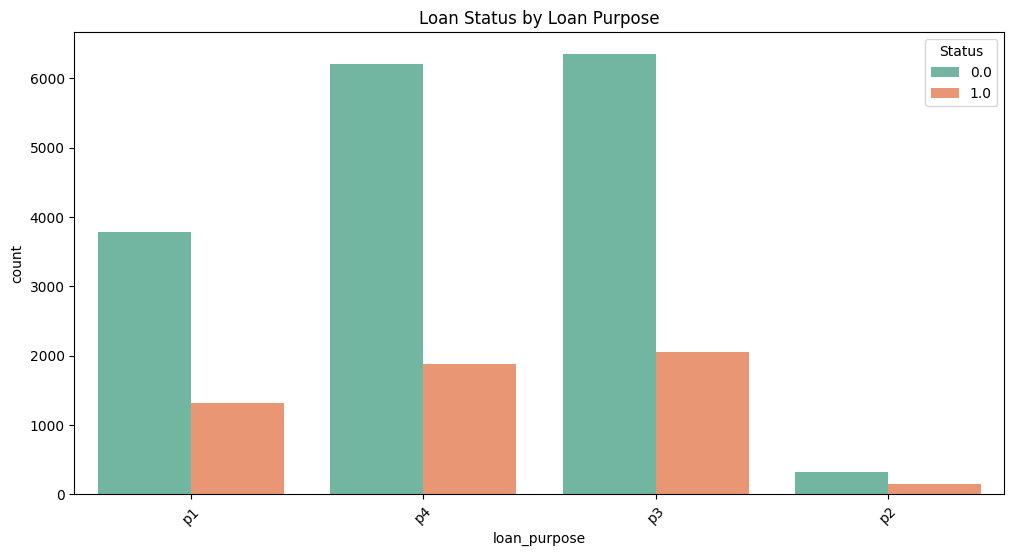

In [ ]:
# Countplot: Loan Purpose vs Status
plt.figure(figsize=(12,6))
sns.countplot(x='loan_purpose', hue='Status', data=df, palette='Set2')
plt.title("Loan Status by Loan Purpose")
plt.xticks(rotation=45)
plt.show()

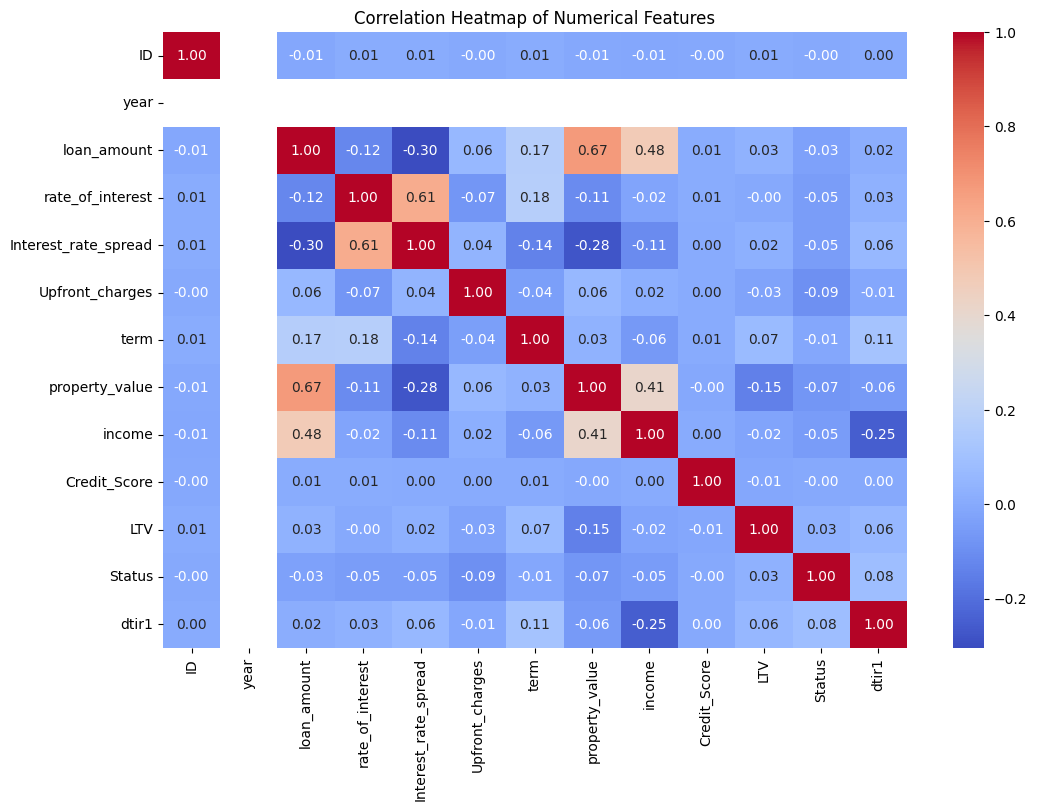

In [ ]:
# Heatmap: Correlation of Numerical Features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

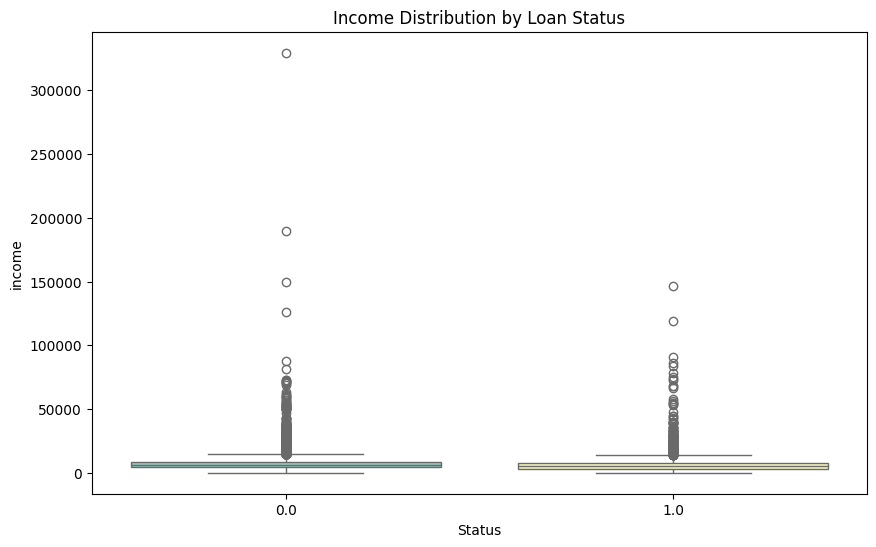

In [ ]:
# Boxplot: Income vs Loan Status
plt.figure(figsize=(10,6))
sns.boxplot(x='Status', y='income', data=df, palette='Set3', hue='Status', legend=False)
plt.title("Income Distribution by Loan Status")
plt.show()

ASSIGNMENT 1

KEY INSIGHTS :

1. Loan Purpose and Status: The countplot shows that loan purpose 'p3' has the highest number of applications. For all loan purposes, there are significantly more approved loans (Status 0) than rejected loans (Status 1).

2. Credit Score Distribution: The distribution of Credit Scores is roughly bell-shaped, with the majority of scores falling between 600 and 800.

3. Income and Loan Status: The boxplot shows that there isn't a significant difference in the median income between those with approved loans (Status 0) and those with rejected loans (Status 1). However, the distribution of income for approved loans appears to be slightly wider, suggesting more variability in income among approved applicants.

Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select 4 numerical features to scale
numerical_features  = ['loan_amount', 'rate_of_interest', 'Upfront_charges']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check the transformed dataset
print(df.head())

      ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP         758.0                 

In [ ]:
# categorical encoding - pd.get_dummies() converts categorical variables into numerical (0/1) columns, which ML models can work with.
df = pd.get_dummies(df, drop_first=True)
print(df.head())

      ID  year  loan_amount  rate_of_interest  Interest_rate_spread  \
0  24890  2019    -1.172861         -0.087761               0.38945   
1  24891  2019    -0.683302         -0.087761               0.38945   
2  24892  2019     0.404607          1.089074               0.20000   
3  24893  2019     0.676585          0.449040               0.68100   
4  24894  2019     1.982076         -0.067115               0.30420   

   Upfront_charges   term  property_value   income  Credit_Score  ...  \
0        -0.164059  360.0        118000.0   1740.0         758.0  ...   
1        -0.164059  360.0        418000.0   4980.0         552.0  ...   
2        -0.888266  360.0        508000.0   9480.0         834.0  ...   
3        -0.164059  360.0        658000.0  11880.0         587.0  ...   
4        -1.100602  360.0        758000.0  10440.0         602.0  ...   

   age_45-54  age_55-64  age_65-74  age_<25  age_>74  \
0      False      False      False    False    False   
1      False       Tru

Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = df.drop('Status', axis=1)
y = df['Status']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1000) # Increased max_iter
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("ROC AUC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ROC AUC: 0.7485714462299135
Confusion Matrix:
 [[4927   73]
 [ 790  828]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      5000
         1.0       0.92      0.51      0.66      1618

    accuracy                           0.87      6618
   macro avg       0.89      0.75      0.79      6618
weighted avg       0.88      0.87      0.86      6618



ADVANCED MODELING

XGBoost Modeling

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize and train XGBoost model
# Using a common objective for binary classification and setting a random state for reproducibility
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost ROC AUC:", roc_auc_score(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost ROC AUC: 0.9998499849984999
XGBoost Confusion Matrix:
 [[3332    1]
 [   0 1079]]
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3333
         1.0       1.00      1.00      1.00      1079

    accuracy                           1.00      4412
   macro avg       1.00      1.00      1.00      4412
weighted avg       1.00      1.00      1.00      4412



LightGBM Modeling

In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize and train LightGBM model
# Using a common objective for binary classification and setting a random state for reproducibility
lgb_model = lgb.LGBMClassifier(objective='binary', random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
print("LightGBM ROC AUC:", roc_auc_score(y_test, y_pred_lgb))
print("LightGBM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4315, number of negative: 13331
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2081
[LightGBM] [Info] Number of data points in the train set: 17646, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.244531 -> initscore=-1.127995
[LightGBM] [Info] Start training from score -1.127995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

Model Comparison

In [ ]:
# Compare ROC AUC
print("ROC AUC Comparison:")
print(f"Logistic Regression: {roc_auc_score(y_test, model.predict(X_test)):.4f}")
print(f"XGBoost: {roc_auc_score(y_test, y_pred_xgb):.4f}")
print(f"LightGBM: {roc_auc_score(y_test, y_pred_lgb):.4f}")

# Compare Confusion Matrices
print("\nConfusion Matrix Comparison:")
print("Logistic Regression:\n", confusion_matrix(y_test, model.predict(X_test)))
print("XGBoost:\n", confusion_matrix(y_test, y_pred_xgb))
print("LightGBM:\n", confusion_matrix(y_test, y_pred_lgb))

# Feature Importance (for tree-based models: XGBoost and LightGBM)
print("\nFeature Importance:")

# XGBoost Feature Importance
print("\nXGBoost Feature Importance:")
xgb_feature_importance = pd.DataFrame({'feature': X.columns, 'importance': xgb_model.feature_importances_}).sort_values('importance', ascending=False)
print(xgb_feature_importance.head(10)) # Display top 10 features

# LightGBM Feature Importance
print("\nLightGBM Feature Importance:")
lgb_feature_importance = pd.DataFrame({'feature': X.columns, 'importance': lgb_model.feature_importances_}).sort_values('importance', ascending=False)
print(lgb_feature_importance.head(10)) # Display top 10 features

ROC AUC Comparison:
Logistic Regression: 0.5000
XGBoost: 0.9998
LightGBM: 0.9998

Confusion Matrix Comparison:
Logistic Regression:
 [[3333    0]
 [1079    0]]
XGBoost:
 [[3332    1]
 [   0 1079]]
LightGBM:
 [[3332    1]
 [   0 1079]]

Feature Importance:

XGBoost Feature Importance:
                         feature  importance
36              credit_type_EQUI    0.518211
4           Interest_rate_spread    0.463697
5                Upfront_charges    0.013261
3               rate_of_interest    0.002376
38  co-applicant_credit_type_EXP    0.000439
18               loan_type_type3    0.000358
40                     age_45-54    0.000315
6                           term    0.000168
0                             ID    0.000143
2                    loan_amount    0.000139

LightGBM Feature Importance:
                 feature  importance
0                     ID         398
4   Interest_rate_spread         224
2            loan_amount          90
7         property_value          36
8    

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


TASK : Mapping top borrowers by predicted risk to recommended actions

Predict probabilities :
Use the best-performing model(XGBoost) to predict the probability of loan rejection for each borrower in the original dataset.

In [ ]:
# Predict the probability of loan rejection (Status = 1) using the best model (XGBoost)
predicted_proba = xgb_model.predict_proba(X_scaled)[:, 1]

# Store the predicted probabilities in a new column in the original DataFrame
df['predicted_proba'] = predicted_proba

# Display the first few rows with the new column
display(df.head())

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,...,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct,predicted_proba
0,24890,2019,-1.172861,-0.087761,0.38945,-0.164059,360.0,118000.0,1740.0,758.0,...,False,False,False,False,True,False,False,True,True,0.001898
1,24891,2019,-0.683302,-0.087761,0.38945,-0.164059,360.0,418000.0,4980.0,552.0,...,True,False,False,False,True,False,False,False,True,0.752010
2,24892,2019,0.404607,1.089074,0.20000,-0.888266,360.0,508000.0,9480.0,834.0,...,False,False,False,False,True,False,False,True,True,0.000064
3,24893,2019,0.676585,0.449040,0.68100,-0.164059,360.0,658000.0,11880.0,587.0,...,False,False,False,False,False,False,False,False,True,0.000353
4,24894,2019,1.982076,-0.067115,0.30420,-1.100602,360.0,758000.0,10440.0,602.0,...,False,False,False,False,False,False,False,False,True,0.000069


Identify high-risk borrowers : Create a new column to store the predicted risk level (e.g., 'High Risk', 'Low Risk') based on the predicted probabilities and a chosen threshold.

In [ ]:
# Define a threshold for high risk
risk_threshold = 0.5

# Create the 'risk_level' column based on the threshold
df['risk_level'] = df['predicted_proba'].apply(lambda x: 'High Risk' if x >= risk_threshold else 'Low Risk')

# Display the count of borrowers in each risk level
print("\nDistribution of Risk Levels:")
print(df['risk_level'].value_counts())

# Display the first few rows with the new column
display(df.head())


Distribution of Risk Levels:
risk_level
Low Risk     19782
High Risk     2276
Name: count, dtype: int64


,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,...,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct,predicted_proba,risk_level
0,24890,2019,-1.172861,-0.087761,0.38945,-0.164059,360.0,118000.0,1740.0,758.0,...,False,False,False,True,False,False,True,True,0.001898,Low Risk
1,24891,2019,-0.683302,-0.087761,0.38945,-0.164059,360.0,418000.0,4980.0,552.0,...,False,False,False,True,False,False,False,True,0.752010,High Risk
2,24892,2019,0.404607,1.089074,0.20000,-0.888266,360.0,508000.0,9480.0,834.0,...,False,False,False,True,False,False,True,True,0.000064,Low Risk
3,24893,2019,0.676585,0.449040,0.68100,-0.164059,360.0,658000.0,11880.0,587.0,...,False,False,False,False,False,False,False,True,0.000353,Low Risk
4,24894,2019,1.982076,-0.067115,0.30420,-1.100602,360.0,758000.0,10440.0,602.0,...,False,False,False,False,False,False,False,True,0.000069,Low Risk


Map to recommended actions : Define a set of recommended actions for different risk levels and map these actions to the borrowers based on their predicted risk.


In [ ]:
# Define recommended actions for each risk level
recommended_actions = {
    'High Risk': 'Further review required',
    'Low Risk': 'Proceed with standard processing'
}

# Map the recommended actions to the 'risk_level' column
df['recommended_action'] = df['risk_level'].map(recommended_actions)

# Display the first few rows with the new column
display(df.head())

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,...,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct,predicted_proba,risk_level,recommended_action
0,24890,2019,-1.172861,-0.087761,0.38945,-0.164059,360.0,118000.0,1740.0,758.0,...,False,False,True,False,False,True,True,0.001898,Low Risk,Proceed with standard processing
1,24891,2019,-0.683302,-0.087761,0.38945,-0.164059,360.0,418000.0,4980.0,552.0,...,False,False,True,False,False,False,True,0.752010,High Risk,Further review required
2,24892,2019,0.404607,1.089074,0.20000,-0.888266,360.0,508000.0,9480.0,834.0,...,False,False,True,False,False,True,True,0.000064,Low Risk,Proceed with standard processing
3,24893,2019,0.676585,0.449040,0.68100,-0.164059,360.0,658000.0,11880.0,587.0,...,False,False,False,False,False,False,True,0.000353,Low Risk,Proceed with standard processing
4,24894,2019,1.982076,-0.067115,0.30420,-1.100602,360.0,758000.0,10440.0,602.0,...,False,False,False,False,False,False,True,0.000069,Low Risk,Proceed with standard processing


Results : Show the top borrowers by predicted risk and their corresponding recommended actions.


In [ ]:
# Sort by predicted_proba in descending order
top_borrowers_by_risk = df.sort_values(by='predicted_proba', ascending=False)

# Display the top 20 borrowers with relevant columns
display(top_borrowers_by_risk[['ID', 'predicted_proba', 'risk_level', 'recommended_action']].head(20))

,ID,predicted_proba,risk_level,recommended_action
18263,43153,0.990710,High Risk,Further review required
15005,39895,0.804185,High Risk,Further review required
1968,26858,0.804185,High Risk,Further review required
4584,29474,0.804185,High Risk,Further review required
4549,29439,0.804185,High Risk,Further review required
15240,40130,0.804185,High Risk,Further review required
14987,39877,0.804185,High Risk,Further review required
1530,26420,0.804185,High Risk,Further review required
8313,33203,0.804185,High Risk,Further review required
8242,33132,0.804185,High Risk,Further review required


Data Analysis Key Findings

*   The XGBoost model was used to predict the probability of loan rejection for each borrower.
*   Based on a risk threshold of 0.5, 2276 borrowers were classified as 'High Risk' and 19782 as 'Low Risk'.
*   Recommended actions were assigned based on the risk level: 'Further review required' for 'High Risk' and 'Proceed with standard processing' for 'Low Risk'.
*   The top 20 borrowers with the highest predicted probability of rejection were identified and their recommended action is 'Further review required'.